<a href="https://colab.research.google.com/github/Rayhanyl/Internship2/blob/main/MultinomialNaiveBayes_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving NFTtweet_1000.csv to NFTtweet_1000.csv


In [ ]:
dataset = pd.read_csv('NFTtweet_1000.csv')
dataset.head(5)

In [ ]:
print(dataset.shape)
print(dataset.columns)

(999, 3)
Index(['user_name', 'date', 'text'], dtype='object')


In [ ]:
import re

#Cleaning Text
def cleaning_text(text):
    # replace RT tag
    text = re.sub('RT\s', '', text)
    # replace @_username
    text = re.sub('\B@\w+', '', text)
    # replace URL
    text = re.sub('(http|https):\/\/\S+', '', text)
    # replace #_something_
    text = re.sub('#+', '', text)
    # konversi huruf kapital ke huruf kecil semua
    text = text.lower()
    # replace kata yang berulang-ulang ('oooooo' menjadi '00')
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # replace punctuation repetition dengan single occurance ('!!!!!!' ,enjadi '!')
    text = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', text)
    # menhilangkan angka dan spesial karakter, hanya mengambil alfabet saja
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

dataset['clean_text'] = dataset['text'].apply(lambda x: cleaning_text(x))
dataset.head(10)

,user_name,date,text,clean_text
0,Crazino.eth,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,nft nfts bluechipnft yield is coming next
1,NFT Drops,2021-11-14 15:54:48+00:00,ðŸ”¥ðŸ”¥ðŸ”¥ HOT #NFT DROP ALERT ðŸ”¥ðŸ”¥ðŸ”¥ ...,hot nft drop ale ...
2,Laercio Macho,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,i am happy to participate guildfi ...
3,Jillmarkin,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,the metamask experience xecturkey xec ecash n...
4,huck wirtz,2021-11-14 15:54:47+00:00,ðŸ”¥âš”ï¸âš”ï¸ðŸ®âš”ï¸âš”ï¸ðŸ”¥Â Part of ...,part of ...
5,NFT Drops,2021-11-14 15:54:47+00:00,ðŸ”¥ðŸ”¥ðŸ”¥ HOT #NFT DROP ALERT ðŸ”¥ðŸ”¥ðŸ”¥ ...,hot nft drop ale ...
6,Nika Che,2021-11-14 15:54:47+00:00,@nftspacewalker Freedom farm\n\nauction\n\n#hi...,freedom farm auction hicnft hic tezos teznf...
7,Hex | DSNR,2021-11-14 15:54:46+00:00,Check our latest work! @designer_punks is lit!...,check our latest work is lit og spots will ...
8,sahinkocart,2021-11-14 15:54:46+00:00,check out my new NFT collection :)\n\nhttps://...,check out my new nft collection nft nfts...
9,Quinten.Akerboom,2021-11-14 15:54:45+00:00,I can't stop looking at this neat #NFT made by...,i can t stop looking at this neat nft made by ...


In [ ]:
import nltk
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset["stopword"] = dataset["clean_text"].apply(lambda text: remove_stopwords(text))
dataset.head(5)

,user_name,date,text,clean_text,stopword
0,Crazino.eth,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,nft nfts bluechipnft yield is coming next,nft nfts bluechipnft yield coming next
1,NFT Drops,2021-11-14 15:54:48+00:00,ðŸ”¥ðŸ”¥ðŸ”¥ HOT #NFT DROP ALERT ðŸ”¥ðŸ”¥ðŸ”¥ ...,hot nft drop ale ...,hot nft drop ale mints nft kishuverse eth block
2,Laercio Macho,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,i am happy to participate guildfi ...,happy participate guildfi nft metaverse web ga...
3,Jillmarkin,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,the metamask experience xecturkey xec ecash n...,metamask experience xecturkey xec ecash nft
4,huck wirtz,2021-11-14 15:54:47+00:00,ðŸ”¥âš”ï¸âš”ï¸ðŸ®âš”ï¸âš”ï¸ðŸ”¥Â Part of ...,part of ...,part lands mootopia nft rpg cardgame heroes ab...


In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

dataset["lemmatized"] = dataset["stopword"].apply(lambda text: lemmatize_words(text))
dataset.head()

,user_name,date,text,clean_text,stopword,lemmatized
0,Crazino.eth,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,nft nfts bluechipnft yield is coming next,nft nfts bluechipnft yield coming next,nft nfts bluechipnft yield come next
1,NFT Drops,2021-11-14 15:54:48+00:00,ðŸ”¥ðŸ”¥ðŸ”¥ HOT #NFT DROP ALERT ðŸ”¥ðŸ”¥ðŸ”¥ ...,hot nft drop ale ...,hot nft drop ale mints nft kishuverse eth block,hot nft drop ale mint nft kishuverse eth block
2,Laercio Macho,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,i am happy to participate guildfi ...,happy participate guildfi nft metaverse web ga...,happy participate guildfi nft metaverse web ga...
3,Jillmarkin,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,the metamask experience xecturkey xec ecash n...,metamask experience xecturkey xec ecash nft,metamask experience xecturkey xec ecash nft
4,huck wirtz,2021-11-14 15:54:47+00:00,ðŸ”¥âš”ï¸âš”ï¸ðŸ®âš”ï¸âš”ï¸ðŸ”¥Â Part of ...,part of ...,part lands mootopia nft rpg cardgame heroes ab...,part land mootopia nft rpg cardgame hero aboun...


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
dataset["test"] = dataset["lemmatized"].apply(lambda text: correct_spellings(text))
dataset.head()

,user_name,date,text,clean_text,stopword,lemmatized,test
0,Crazino.eth,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,nft nfts bluechipnft yield is coming next,nft nfts bluechipnft yield coming next,nft nfts bluechipnft yield come next,not nuts bluechipnft yield come next
1,NFT Drops,2021-11-14 15:54:48+00:00,ðŸ”¥ðŸ”¥ðŸ”¥ HOT #NFT DROP ALERT ðŸ”¥ðŸ”¥ðŸ”¥ ...,hot nft drop ale ...,hot nft drop ale mints nft kishuverse eth block,hot nft drop ale mint nft kishuverse eth block,hot not drop ale mint not kishuverse eth block
2,Laercio Macho,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,i am happy to participate guildfi ...,happy participate guildfi nft metaverse web ga...,happy participate guildfi nft metaverse web ga...,happy participate guild not metaverse web game...
3,Jillmarkin,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,the metamask experience xecturkey xec ecash n...,metamask experience xecturkey xec ecash nft,metamask experience xecturkey xec ecash nft,metamask experience xecturkey rec cash not
4,huck wirtz,2021-11-14 15:54:47+00:00,ðŸ”¥âš”ï¸âš”ï¸ðŸ®âš”ï¸âš”ï¸ðŸ”¥Â Part of ...,part of ...,part lands mootopia nft rpg cardgame heroes ab...,part land mootopia nft rpg cardgame hero aboun...,part land mootopia not rig boardgame hero abou...


In [ ]:
import nltk
import sklearn
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
import pandas as pd
import seaborn as sns

In [ ]:
vader=dataset.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in dataset['test'].values]
dataset['Negative Score']=[i['neg'] for i in sentiments]
dataset['Positive Score']=[i['pos'] for i in sentiments]
dataset['Compound Score']=[i['compound'] for i in sentiments]
score=dataset['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    else:
        t.append('Negative')
dataset['Sentiment']=t

In [ ]:
dataset.head()

,user_name,date,text,clean_text,stopword,lemmatized,test,Negative Score,Positive Score,Neutral Score,Compound Score,Sentiment
0,Crazino.eth,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,nft nfts bluechipnft yield is coming next,nft nfts bluechipnft yield coming next,nft nfts bluechipnft yield come next,not nuts bluechipnft yield come next,0.000,0.282,0.718,0.2411,Positive
1,NFT Drops,2021-11-14 15:54:48+00:00,ðŸ”¥ðŸ”¥ðŸ”¥ HOT #NFT DROP ALERT ðŸ”¥ðŸ”¥ðŸ”¥ ...,hot nft drop ale ...,hot nft drop ale mints nft kishuverse eth block,hot nft drop ale mint nft kishuverse eth block,hot not drop ale mint not kishuverse eth block,0.000,0.376,0.624,0.4973,Positive
2,Laercio Macho,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,i am happy to participate guildfi ...,happy participate guildfi nft metaverse web ga...,happy participate guildfi nft metaverse web ga...,happy participate guild not metaverse web game...,0.000,0.346,0.654,0.5719,Positive
3,Jillmarkin,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,the metamask experience xecturkey xec ecash n...,metamask experience xecturkey xec ecash nft,metamask experience xecturkey xec ecash nft,metamask experience xecturkey rec cash not,0.000,0.000,1.000,0.0000,Negative
4,huck wirtz,2021-11-14 15:54:47+00:00,ðŸ”¥âš”ï¸âš”ï¸ðŸ®âš”ï¸âš”ï¸ðŸ”¥Â Part of ...,part of ...,part lands mootopia nft rpg cardgame heroes ab...,part land mootopia nft rpg cardgame hero aboun...,part land mootopia not rig boardgame hero abou...,0.199,0.187,0.614,-0.2924,Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


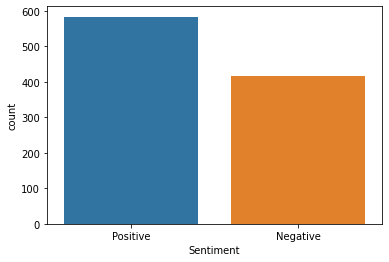

In [ ]:
sns.countplot(dataset['Sentiment'])

In [ ]:
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
#Polaritas Label
def convert(polarity):
    if polarity == 'Positive':
        return 1
    else:
        return 0

dataset['Polarity'] = dataset['Sentiment'].apply(convert)

In [ ]:
val=dataset['Polarity'].value_counts().reset_index()
val.columns=['Polarity','Count']

data=[go.Bar(
  x=val.Polarity,
y=val.Count
)]
layout=go.Layout(
    xaxis=dict(title='Polarity'),
    yaxis=dict(title='Count'))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
X = dataset['test']
y = dataset['Polarity']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
#Count Vectorizer
#Kata-kata ini kemudian perlu dienkode sebagai bilangan bulat, atau nilai floating-point, untuk digunakan sebagai masukan dalam algoritme pembelajaran mesin. Proses ini disebut ekstraksi fitur (atau vektorisasi)

vectorization = CountVectorizer()
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

In [ ]:
Xv_train.shape

(799, 2448)

In [ ]:
Xv_test.shape

(200, 2448)

In [ ]:
#Classifier
mnb = MultinomialNB()
mnb.fit(Xv_train, y_train)

MultinomialNB()

In [ ]:
preds = mnb.predict(Xv_test)

In [ ]:
mnb.score(Xv_test, y_test)

0.8

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        83
           1       0.83      0.82      0.83       117

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
def manual_testing(tweet):
    testing = {"text":[tweet]}
    new_def_test = pd.DataFrame(testing)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    preds = mnb.predict(new_xv_test)
    return preds

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)))

Model accuracy score: 0.8000


In [ ]:
y_pred_train = mnb.predict(Xv_train)

y_pred_train

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9337


In [ ]:
#Overfitting dan underfitting
print('Training set accuracy score: {:.4f}'.format(mnb.score(Xv_train, y_train)))

print('Test set accuracy score: {:.4f}'.format(mnb.score(Xv_test, y_test)))

Training set accuracy score: 0.9337
Test set accuracy score: 0.8000


In [ ]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
with open ('classificationmnb.csv','w') as f:
    for line in s:
        f.write(line)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[64 19]
 [21 96]]

True Positives(TP) =  64

True Negatives(TN) =  96

False Positives(FP) =  19

False Negatives(FN) =  21


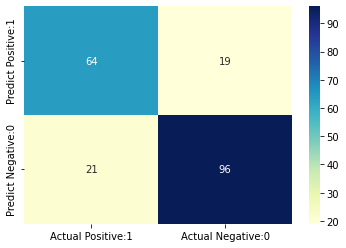

In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
import pickle

with open('multinomial_naivebayes', 'wb') as a:
    pickle.dump(mnb,a)

In [ ]:
with open('vectorize', 'wb') as a:
    pickle.dump(vectorization,a)